In [1]:
from sklearn.metrics import mean_squared_error, r2_score
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import shap
from data import Data

data = Data('../HousingData.csv')
data.load_data()
data.scale_and_transform()

Data loaded from ../HousingData.csv. Shape: (394, 14)
Summary statistics of the data:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     3.690136   11.460660   11.000863    0.068528    0.553215    6.280015   
std      9.202423   23.954082    6.908364    0.252971    0.113112    0.697985   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.081955    0.000000    5.130000    0.000000    0.453000    5.879250   
50%      0.268880    0.000000    8.560000    0.000000    0.538000    6.201500   
75%      3.435973   12.500000   18.100000    0.000000    0.624000    6.605500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    68.932741    3

In [2]:
from sklearn.ensemble import RandomForestRegressor
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from data import Data
from model import get_model
from importance import Importance
from train import train_model
from result import analyze_results, plot_shap_summary
import utils
import shap
import json
import os
X_train, X_val, y_train, y_val = train_test_split(data.X, data.y, test_size=0.2, random_state=0)
model = train_model(X_train, y_train, X_val, y_val, X_train.shape[1])
X_tensor = torch.tensor(data.X, dtype=torch.float32)

Epoch 1, Validation Loss: 513.1262
Epoch 2, Validation Loss: 475.7907
Epoch 3, Validation Loss: 419.8558
Epoch 4, Validation Loss: 341.0703
Epoch 5, Validation Loss: 243.7230
Epoch 6, Validation Loss: 147.0100
Epoch 7, Validation Loss: 85.0757
Epoch 8, Validation Loss: 66.4419
Epoch 9, Validation Loss: 57.6427
Epoch 10, Validation Loss: 50.0676
Epoch 11, Validation Loss: 45.6783
Epoch 12, Validation Loss: 41.8971
Epoch 13, Validation Loss: 38.8025
Epoch 14, Validation Loss: 36.8054
Epoch 15, Validation Loss: 35.9836
Epoch 16, Validation Loss: 34.7081
Epoch 17, Validation Loss: 34.3039
Epoch 18, Validation Loss: 32.9743
Epoch 19, Validation Loss: 32.0189
Epoch 20, Validation Loss: 31.9377
Epoch 21, Validation Loss: 30.9305
Epoch 22, Validation Loss: 29.9244
Epoch 23, Validation Loss: 29.8556
Epoch 24, Validation Loss: 29.3364
Epoch 25, Validation Loss: 28.4074
Epoch 26, Validation Loss: 27.6256
Epoch 27, Validation Loss: 27.1358
Epoch 28, Validation Loss: 26.7493
Epoch 29, Validation Lo

In [3]:
explainer = shap.DeepExplainer(model, X_tensor)
shap_values = explainer.shap_values(X_tensor, check_additivity=False)
print(shap_values.shape)
print(explainer.expected_value)

(394, 12, 1)
[22.118269]


In [6]:
print(data.features)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')


In [4]:
#Force Plot for a single observation for a single class 3
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :, 0], data.X[0, :], feature_names=data.features, figsize=30, text_rotation=1)

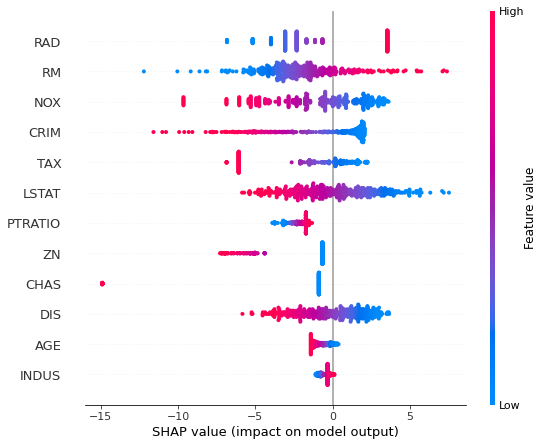

In [13]:
shap.initjs()
shap.summary_plot(shap_values[:, :, 0], data.X, feature_names=data.features)

In [21]:
l = data.features
l[1]

'ZN'

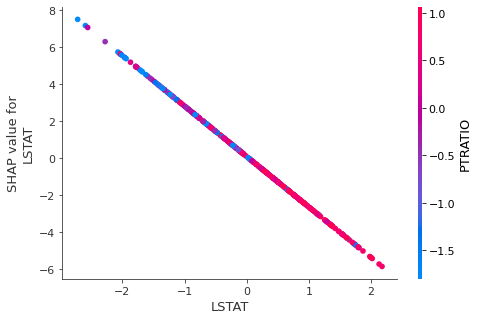

In [25]:
shap.dependence_plot('LSTAT', shap_values[:, :, 0], data.X, dot_size=32, show=False, feature_names=data.features)